# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mocuba
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sar-e pul
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | urengoy
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | oliveira
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | ola
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | atuona
Processing Record 23 of S

Processing Record 40 of Set 4 | dunedin
Processing Record 41 of Set 4 | sorvag
City not found. Skipping...
Processing Record 42 of Set 4 | shenkursk
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | tashigang
Processing Record 47 of Set 4 | olafsvik
Processing Record 48 of Set 4 | motala
Processing Record 49 of Set 4 | guerrero negro
Processing Record 0 of Set 5 | ribeira grande
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | mindelo
Processing Record 4 of Set 5 | ponta do sol
Processing Record 5 of Set 5 | necochea
Processing Record 6 of Set 5 | mehamn
Processing Record 7 of Set 5 | jensen beach
Processing Record 8 of Set 5 | rodrigues alves
Processing Record 9 of Set 5 | cayenne
Processing Record 10 of Set 5 | dubbo
Processing Record 11 of Set 5 | requena
Processing Record 12 of Set 5 | barra do garcas
Processing Rec

Processing Record 27 of Set 8 | poya
Processing Record 28 of Set 8 | caxito
Processing Record 29 of Set 8 | fortuna
Processing Record 30 of Set 8 | mitu
Processing Record 31 of Set 8 | saint george
Processing Record 32 of Set 8 | solnechnyy
Processing Record 33 of Set 8 | asyut
Processing Record 34 of Set 8 | nantucket
Processing Record 35 of Set 8 | karabulak
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | mahanoro
Processing Record 38 of Set 8 | linxia
Processing Record 39 of Set 8 | dnipryany
Processing Record 40 of Set 8 | puerto ayacucho
Processing Record 41 of Set 8 | west bay
Processing Record 42 of Set 8 | grand-santi
Processing Record 43 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 8 | rambha
Processing Record 45 of Set 8 | qandala
Processing Record 46 of Set 8 | tarudant
City not found. Skipping...
Processing Record 47 of Set 8 | tooele
Processing Record 48 of Set 8 | gubkinskiy
Processing Record 49 of Set 8 |

Processing Record 10 of Set 12 | saravan
Processing Record 11 of Set 12 | palimbang
Processing Record 12 of Set 12 | bonfim
Processing Record 13 of Set 12 | chichigalpa
Processing Record 14 of Set 12 | banagher
Processing Record 15 of Set 12 | altamont
Processing Record 16 of Set 12 | marsaxlokk
Processing Record 17 of Set 12 | muzhi
Processing Record 18 of Set 12 | akdepe
Processing Record 19 of Set 12 | lingao
Processing Record 20 of Set 12 | dargaville
Processing Record 21 of Set 12 | yining
Processing Record 22 of Set 12 | rock sound
Processing Record 23 of Set 12 | chimore
Processing Record 24 of Set 12 | mian channun
Processing Record 25 of Set 12 | north platte
Processing Record 26 of Set 12 | yabassi
Processing Record 27 of Set 12 | grand gaube
Processing Record 28 of Set 12 | wahiawa
Processing Record 29 of Set 12 | wanxian
Processing Record 30 of Set 12 | sterling
Processing Record 31 of Set 12 | qasigiannguit
Processing Record 32 of Set 12 | mananara
Processing Record 33 of 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Counta
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [26]:
# Display sample data
city_df = city_data_df.rename(columns={"Max Temp": "Max Temp °K"})
celcius = city_df["Max Temp °K"] - 273.15
city_df["Max Temp °C"] = celcius
city_df.head()

,City,Lat,Lng,Max Temp °K,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp °C
0,mocuba,-16.8392,36.9856,297.55,88,97,2.10,MZ,1675791316,24.40
1,ushuaia,-54.8000,-68.3000,285.96,50,40,5.66,AR,1675791241,12.81
2,sar-e pul,35.8333,66.1667,277.01,55,55,5.81,AF,1675791317,3.86
3,hilo,19.7297,-155.0900,296.08,89,75,3.09,US,1675791318,22.93
4,urengoy,65.9667,78.3667,242.24,100,92,2.10,RU,1675791321,-30.91


In [31]:
# Export the City_Data into a csv
city_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_df.head()

,City,Lat,Lng,Max Temp °K,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp °C
City_ID,,,,,,,,,,
0,mocuba,-16.8392,36.9856,297.55,88,97,2.10,MZ,1675791316,24.40
1,ushuaia,-54.8000,-68.3000,285.96,50,40,5.66,AR,1675791241,12.81
2,sar-e pul,35.8333,66.1667,277.01,55,55,5.81,AF,1675791317,3.86
3,hilo,19.7297,-155.0900,296.08,89,75,3.09,US,1675791318,22.93
4,urengoy,65.9667,78.3667,242.24,100,92,2.10,RU,1675791321,-30.91


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

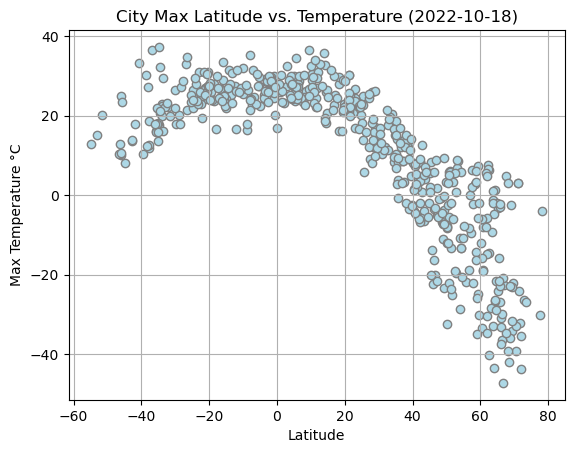

In [33]:
# Build scatter plot for latitude vs. temperature
x_axis = city_df["Lat"]
y_axis = city_df["Max Temp °C"]

# Incorporate the other graph properties
lat_temp_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
lat_temp_scat = plt.title("City Max Latitude vs. Temperature (2022-10-18)")
lat_temp_scat = plt.xlabel("Latitude")
lat_temp_scat = plt.ylabel("Max Temperature °C")
lat_temp_scat = plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

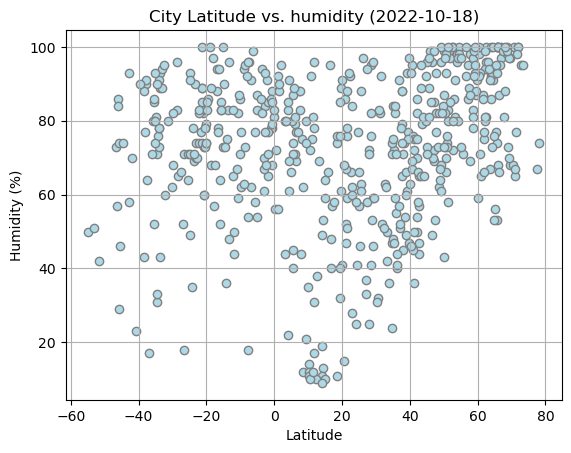

In [34]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_df["Lat"]
y_axis = city_df["Humidity"]

# Incorporate the other graph properties
lat_hum_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
lat_hum_scat = plt.title("City Latitude vs. humidity (2022-10-18)")
lat_hum_scat = plt.xlabel("Latitude")
lat_hum_scat = plt.ylabel("Humidity (%)")
lat_hum_scat = plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

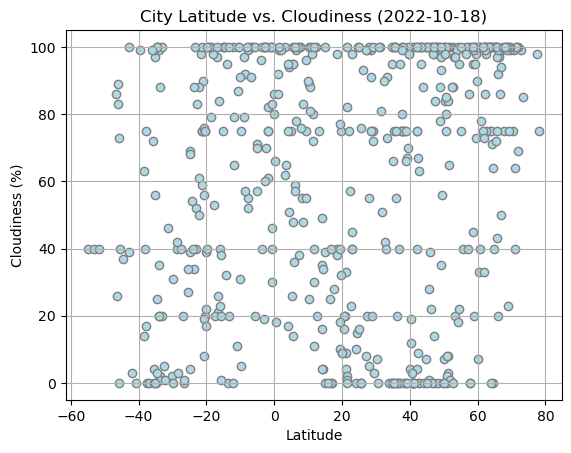

In [37]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_df["Lat"]
y_axis = city_df["Cloudiness"]

# Incorporate the other graph properties
lat_cloud_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
lat_cloud_scat = plt.title("City Latitude vs. Cloudiness (2022-10-18)")
lat_cloud_scat = plt.xlabel("Latitude")
lat_cloud_scat = plt.ylabel("Cloudiness (%)")
lat_cloud_scat = plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

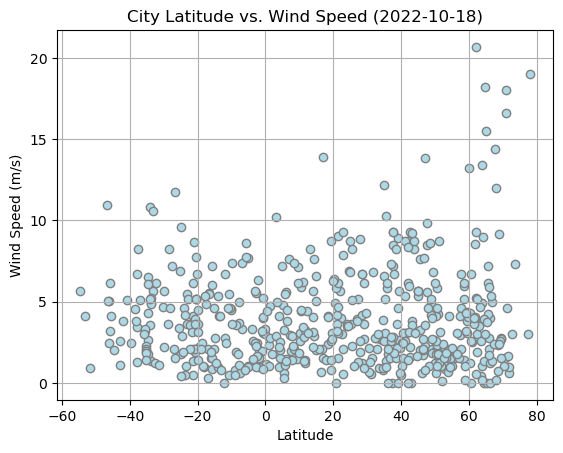

In [38]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_df["Lat"]
y_axis = city_df["Wind Speed"]

# Incorporate the other graph properties
lat_wind_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
lat_wind_scat = plt.title("City Latitude vs. Wind Speed (2022-10-18)")
lat_wind_scat = plt.xlabel("Latitude")
lat_wind_scat = plt.ylabel("Wind Speed (m/s)")
lat_wind_scat = plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
linregress(x_axis, y_axis) = (slope, intercept, rvalue, pvalue, stderr)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_df.loc[city_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp °K,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp °C
City_ID,,,,,,,,,,
2,sar-e pul,35.8333,66.1667,277.01,55,55,5.81,AF,1675791317,3.86
3,hilo,19.7297,-155.0900,296.08,89,75,3.09,US,1675791318,22.93
4,urengoy,65.9667,78.3667,242.24,100,92,2.10,RU,1675791321,-30.91
5,butaritari,3.0707,172.7902,300.45,80,100,10.18,KI,1675790894,27.30
6,sao filipe,14.8961,-24.4956,293.76,64,0,6.55,CV,1675790631,20.61


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_df.loc[city_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp °K,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp °C
City_ID,,,,,,,,,,
0,mocuba,-16.8392,36.9856,297.55,88,97,2.10,MZ,1675791316,24.40
1,ushuaia,-54.8000,-68.3000,285.96,50,40,5.66,AR,1675791241,12.81
9,bredasdorp,-34.5322,20.0403,293.90,71,100,4.30,ZA,1675791278,20.75
10,tuatapere,-46.1333,167.6833,283.29,86,89,5.02,NZ,1675791048,10.14
12,vaini,-21.2000,-175.2000,297.24,100,75,0.51,TO,1675791044,24.09


###  Temperature vs. Latitude Linear Regression Plot

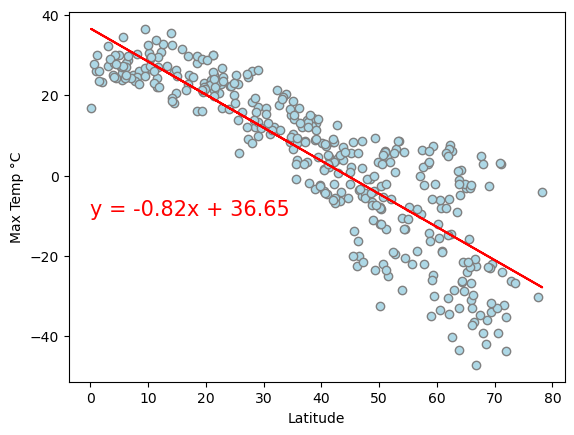

In [83]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp °C"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

north_temp_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
north_temp_scat = plt.plot(x_axis, regress_values, color="red")
north_temp_scat = plt.annotate(line_eq, (0,-10), fontsize=15, color="red")
north_temp_scat = plt.xlabel("Latitude")
north_temp_scat = plt.ylabel("Max Temp °C")

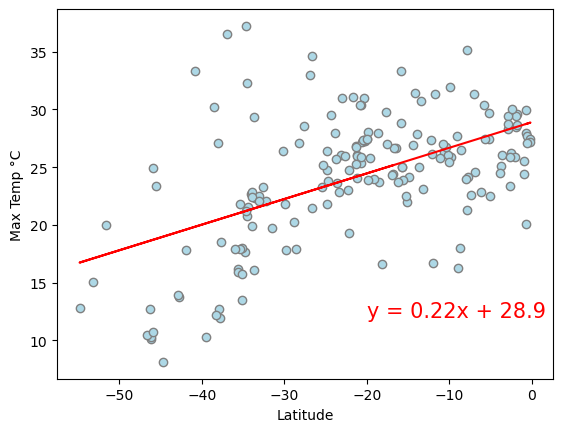

In [82]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp °C"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_temp_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
south_temp_scat = plt.plot(x_axis, regress_values, color="red")
south_temp_scat = plt.annotate(line_equ, (-20, 12), fontsize=15, color="red")
south_temp_scat = plt.xlabel("Latitude")
south_temp_scat = plt.ylabel("Max Temp °C")

Discussion about the linear relationship: Without in depth, deviating discussion regarding astronomy, it is vastly understood that earth is hotter near the equator as the sun's rays hit at a more direct angle than the poles. Thus, it makes sense that temperature would increase in both the northern and soouthern hemispheres as latitude approached 0 at the equator. 

### Humidity vs. Latitude Linear Regression Plot

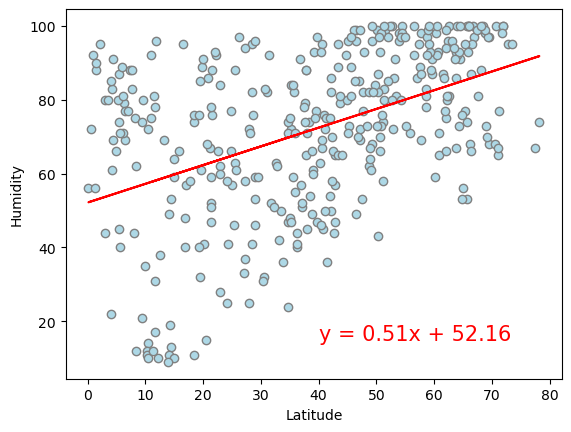

In [96]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hum_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
north_hum_scat = plt.plot(x_axis, regress_values, color="red")
north_hum_scat = plt.annotate(line_equ, (40, 15), fontsize=15, color="red")
north_hum_scat = plt.xlabel("Latitude")
north_hum_scat = plt.ylabel("Humidity")

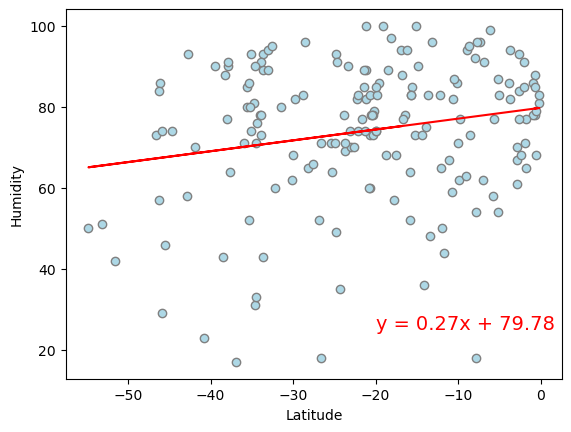

In [101]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hum_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
south_hum_scat = plt.plot(x_axis, regress_values, color="red")
south_hum_scat = plt.annotate(line_equ, (-20, 25), fontsize=14, color="red")
south_hum_scat = plt.xlabel("Latitude")
south_hum_scat = plt.ylabel("Humidity")

Discussion about the linear relationship: In the northern hemisphere, it is somewhat accurate that humidity increases with distance from the equator. It is most noticable that at high latitudes, humidity is concentrated at a higher value than the spread observed as latitude is less and closer to the equator. In the southern hemisphere there is arguable an increase in humidity as latiudes approach the equator, but this relationship is very faint with numerous outliers. 

### Cloudiness vs. Latitude Linear Regression Plot

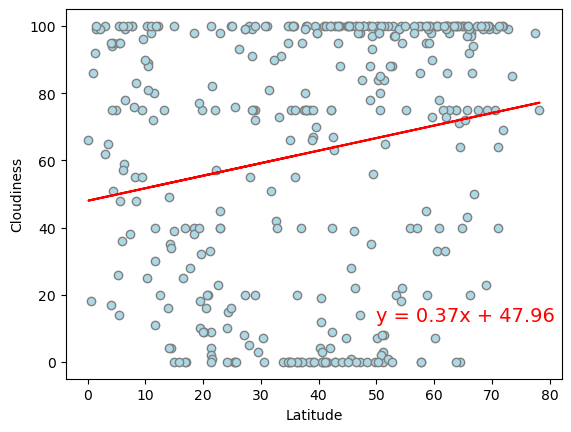

In [107]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_cloud_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
north_cloud_scat = plt.plot(x_axis, regress_values, color="red")
north_cloud_scat = plt.annotate(line_equ, (50, 12), fontsize=14, color="red")
north_cloud_scat = plt.xlabel("Latitude")
north_cloud_scat = plt.ylabel("Cloudiness")

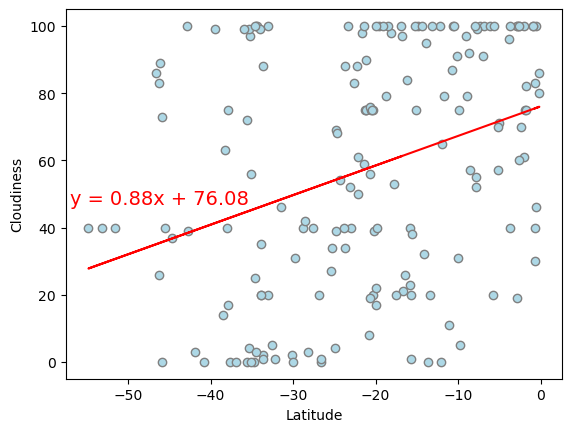

In [116]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_cloud_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
south_cloud_scat = plt.plot(x_axis, regress_values, color="red")
south_cloud_scat = plt.annotate(line_equ, (-57, 47), fontsize=14, color="red")
south_cloud_scat = plt.xlabel("Latitude")
south_cloud_scat = plt.ylabel("Cloudiness")

Discussion about the linear relationship: In general for both the northern and southern hemispheres there is little to no observable relationship between latitude and cloudiness. With that said, the little correlation may be seen an increase in latitude results in more cloudiness objectively from the equation.

### Wind Speed vs. Latitude Linear Regression Plot

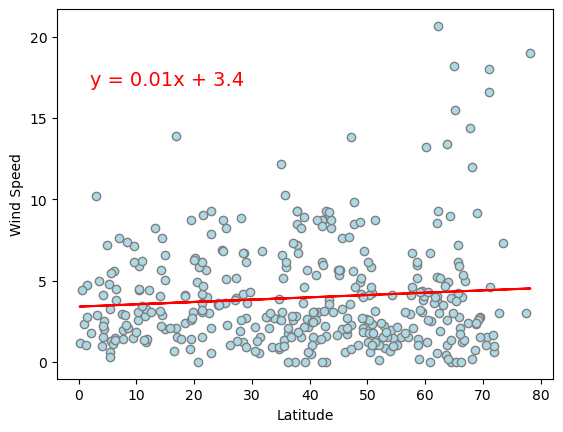

In [121]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_wind_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
north_wind_scat = plt.plot(x_axis, regress_values, color="red")
north_wind_scat = plt.annotate(line_equ, (2, 17), fontsize=14, color="red")
north_wind_scat = plt.xlabel("Latitude")
north_wind_scat = plt.ylabel("Wind Speed")

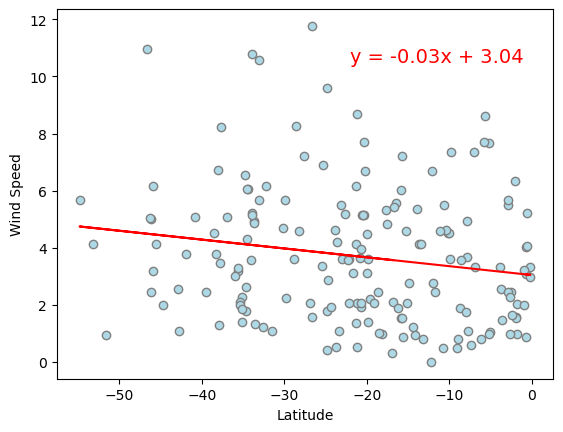

In [125]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_cloud_scat = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="gray")
south_cloud_scat = plt.plot(x_axis, regress_values, color="red")
south_cloud_scat = plt.annotate(line_equ, (-22, 10.5), fontsize=14, color="red")
south_cloud_scat = plt.xlabel("Latitude")
south_cloud_scat = plt.ylabel("Wind Speed")

Discussion about the linear relationship: The linear regretion slops for latitude and wind speed were 0.03 and 0.01 for the northern and southern hemispheres respectively. This implies no observable correlation between these variables.